In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import time

import torch.optim as optim

from load_datasets import load_datasets
from torch.utils.data import DataLoader
from utils import *
# from model import *
from model import *
from save_obj import *
import pickle as pkl
from TorchCoder import *

In [2]:
import easydict

args = easydict.EasyDict({
    'path':'./dataset/train/',
    'mode':'dev',
    'pretrained_mode':False,
    'time_limited':5,
    'down_sampling':False,
    'down_sampling_rate':16000,
    'n_mfcc':16,
    'windows':5,
    'hidden_size':42,
    'num_layers':2,
    'batch_size':64,
    'epoch':20,
    'pretrained_model':'./model.pt'
})


In [31]:
datasets = load_datasets(args)

	(0.355 sec)


In [32]:
data_loader = DataLoader(
        datasets, 
        batch_size=args.batch_size, 
        shuffle=False
    )
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"[+] {device} is available")

[+] cpu is available


In [33]:
for data, labels in data_loader:
    inputs = data

In [34]:
inputs.shape

torch.Size([1, 216, 20])

In [35]:
tmp = []
for idx in range(len(inputs)):
    _tmp = inputs[idx]
    _tmp = torch.transpose(_tmp, 1, 0)
    _tmp = _tmp.cpu().detach().numpy()
    tmp.append(_tmp)
    
len(tmp)

1

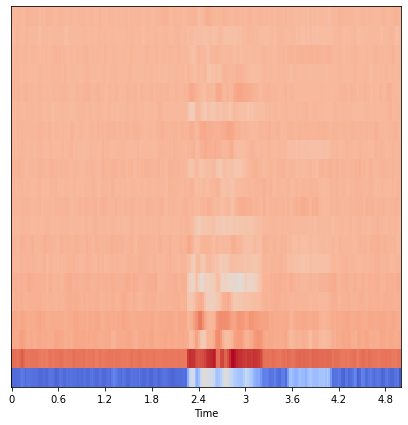

In [36]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
librosa.display.specshow(tmp[0], x_axis='time')
plt.show()

In [37]:
tmp[0]

array([[-3.4906265e+02, -3.1058984e+02, -3.1157007e+02, ...,
        -3.0097549e+02, -2.9614038e+02, -3.3234195e+02],
       [ 8.9976532e+01,  9.5311951e+01,  9.5743698e+01, ...,
         8.3447243e+01,  8.9234947e+01,  8.9744339e+01],
       [ 2.8538618e+01,  2.6752398e+01,  2.7483948e+01, ...,
         2.1006636e+01,  2.1789253e+01,  2.6025940e+01],
       ...,
       [ 1.1696998e+00,  2.2945263e+00,  6.7321663e+00, ...,
        -6.1289970e-02,  4.2664652e+00,  6.1115227e+00],
       [-2.4348152e+00, -6.2043567e+00,  1.9057335e+00, ...,
        -5.4886546e+00, -5.1832213e+00,  2.5965339e-01],
       [ 4.6564131e+00,  3.3065300e+00,  2.3152711e+00, ...,
         1.1190180e+01,  8.0360994e+00,  7.3565545e+00]], dtype=float32)

In [38]:
tmp[0].shape

(20, 216)

In [39]:
data = tmp[0]


In [40]:
_data = np.roll(data, random.randint(1, 10), 1)
_data

array([[-3.0648407e+02, -3.1511478e+02, -3.1426041e+02, ...,
        -3.1284055e+02, -2.9897559e+02, -2.9489877e+02],
       [ 8.9921349e+01,  8.7275864e+01,  8.3240860e+01, ...,
         9.0368729e+01,  9.3152740e+01,  9.1019089e+01],
       [ 2.5019417e+01,  2.5871355e+01,  2.4302370e+01, ...,
         2.6802532e+01,  2.4693729e+01,  2.1035608e+01],
       ...,
       [ 5.2501793e+00,  5.7081652e+00,  1.2273260e+01, ...,
         2.8769364e+00,  2.3641996e+00,  3.0899811e+00],
       [ 4.2353830e+00,  5.3357291e+00,  6.0406013e+00, ...,
         3.6001715e-01,  1.3682021e+00,  6.6463810e-01],
       [-6.1639166e-04,  5.8804603e+00,  7.8571987e+00, ...,
         7.4159231e+00,  7.4459567e+00,  1.7943376e+00]], dtype=float32)

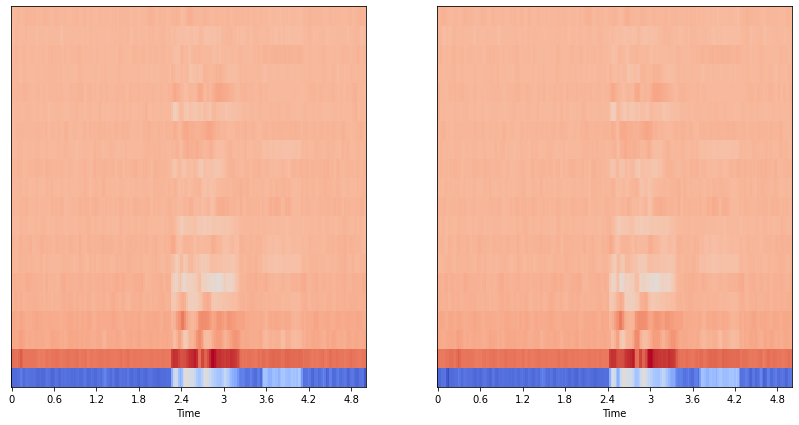

In [43]:


fig, ax = plt.subplots(1, 2, figsize=(14, 7))
librosa.display.specshow(tmp[0], x_axis='time', ax=ax[0])
librosa.display.specshow(_data, x_axis='time', ax=ax[1])
plt.show()